In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [4]:
list_monk= ['Chimp','Bonobo','Gorilla', 'Orangutan','Rhesus',
                         'MacFas','Atys','Baboon','GreenMonkey','Marmoset','Lemur', 'Mouse', 'Danio']

           Chimp    Bonobo   Gorilla  Orangutan    Rhesus    MacFas      Atys  \
exonic  0.295692  0.379772  0.176929   0.316023  0.183705  0.336382  0.309623   
locus   0.127562  0.154189  0.133907   0.128717  0.259800  0.143609  0.146705   
syn     0.576746  0.466039  0.689164   0.555260  0.556495  0.520009  0.543672   

          Baboon  GreenMonkey  Marmoset     Lemur     Mouse     Danio  
exonic  0.289991     0.342973  0.258262  0.073877  0.497111  0.169462  
locus   0.149906     0.161076  0.152186  0.059874  0.088776  0.070929  
syn     0.560103     0.495951  0.589552  0.866248  0.414113  0.759609  


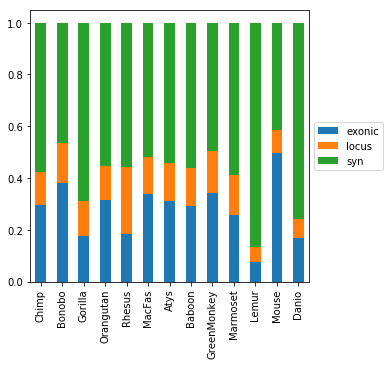

In [71]:
del data

for i in list_monk:
    #p = str("./ort/" + str(i) + ".csv")
    df = pd.read_csv(str("./ort/" + str(i) + ".csv"))
    df['identity'] = np.where(((df.exonID == 0) & (df.locusID == 0)), 'syn', 'locus')
    df['identity_type'] = np.where(((df.identity == 'locus') & (df.exonID > 0)), 'exonic', 'locus')
    df['identity_type'] = np.where(((df.identity == 'syn')), 'syn', df['identity_type'])
    dfm = df.identity_type.value_counts(normalize=True).reset_index()
    dfm.columns = ["type", str(i)]
    dfm = dfm.set_index('type')
    try:
        data = pd.concat([data, dfm], axis=1, sort=True)
    except:
        data = dfm
print(data)
data = data.T
data.plot.bar(stacked=True, figsize=(5, 5),legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("./synt_norm.svg")

        Chimp  Bonobo  Gorilla  Orangutan  Rhesus  MacFas  Atys  Baboon  \
exonic   1414     766      658        712     478    1471  1184    1240   
locus     610     311      498        290     676     628   561     641   
syn      2758     940     2563       1251    1448    2274  2079    2395   

        GreenMonkey  Marmoset  Lemur  Mouse  Danio  
exonic         1186       969    153   2839    485  
locus           557       571    124    507    203  
syn            1715      2212   1794   2365   2174  


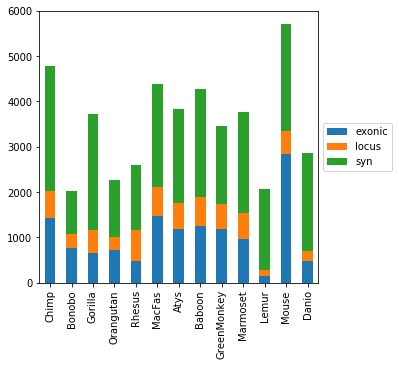

In [72]:
del data

for i in list_monk:
    #p = str("./ort/" + str(i) + ".csv")
    df = pd.read_csv(str("./ort/" + str(i) + ".csv"))
    df['identity'] = np.where(((df.exonID == 0) & (df.locusID == 0)), 'syn', 'locus')
    df['identity_type'] = np.where(((df.identity == 'locus') & (df.exonID > 0)), 'exonic', 'locus')
    df['identity_type'] = np.where(((df.identity == 'syn')), 'syn', df['identity_type'])
    dfm = df.identity_type.value_counts().reset_index()
    dfm.columns = ["type", str(i)]
    dfm = dfm.set_index('type')
    try:
        data = pd.concat([data, dfm], axis=1, sort=True)
    except:
        data = dfm
print(data)
data = data.T
data.plot.bar(stacked=True, figsize=(5, 5),legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("./synt.svg")

# brief difference

In [2]:
df = pd.read_csv("./human.csv")
mask = df.Class_code == "u"
column_name = "Transcript_type"
df.loc[mask, column_name] = "novel"
df.loc[df.Transcript_type == "novel", 'Class_code'] = "="
df = df.drop(df[df.Class_code != "="].index)
mask = ["lincRNA", "novel"]
df2= df.loc[df['Transcript_type'].isin(mask)].copy()
df2 = df2.set_index('Transcript')
df2.head(5)
df2.shape
#df2.TPM.plot(kind="box", by='Transcript_type', figsize=(10, 10),)
#dft=df2[['TPM', 'Transcript_type']]
#dft.groupby('Transcript_type').describe()
#dft.boxplot(by='Transcript_type', figsize=(10, 10))

(1155, 28)

In [102]:
dft=df2[['TPM', 'Transcript_type']]
dft.groupby('Transcript_type').describe()

TPM                                                       \
                 count       mean         std       min       25%       50%   
Transcript_type                                                               
lincRNA          814.0  28.314984  690.550829  0.500619  0.802285  1.357883   
novel            341.0   2.897649   10.326201  0.500011  0.621832  0.860269   

                                         
                      75%           max  
Transcript_type                          
lincRNA          2.655734  19698.939453  
novel            1.522899    122.914200

In [107]:
dft=df2[['FPKM', 'Transcript_type']]
dft.groupby('Transcript_type').describe()

FPKM                                                       \
                 count       mean         std       min       25%       50%   
Transcript_type                                                               
lincRNA          814.0  12.976306  316.468438  0.229426  0.367675  0.622296   
novel            341.0   1.327946    4.732333  0.229147  0.284976  0.394247   

                                       
                     75%          max  
Transcript_type                        
lincRNA          1.21708  9027.709961  
novel            0.69792    56.329617

In [105]:
dft=df2[['Length', 'Transcript_type']]
dft.groupby('Transcript_type').describe()

Length                                                  \
                 count         mean          std    min     25%    50%   
Transcript_type                                                          
lincRNA          814.0  1213.485258  1527.597298  201.0  527.25  724.5   
novel            341.0  1075.005865  1462.462742  200.0  333.00  639.0   

                                  
                    75%      max  
Transcript_type                   
lincRNA          1418.0  22743.0  
novel            1268.0  19024.0

In [106]:
dft=df2[['No_of_exons', 'Transcript_type']]
dft.groupby('Transcript_type').describe()

No_of_exons                                              
                      count      mean       std  min  25%  50%  75%   max
Transcript_type                                                          
lincRNA               814.0  2.249386  1.630873  1.0  1.0  2.0  3.0  12.0
novel                 341.0  2.307918  0.652301  2.0  2.0  2.0  2.0   5.0

In [5]:
# exonID locusID lncExonsAligned orthExonsAligned spliceConserved category.human. category.Chimp. identity identity_type
try:
    del data
except:
    pass
for i in list_monk:
    #p = str("./ort/" + str(i) + ".csv")
    df = pd.read_csv(str("./ort/" + str(i) + ".csv"))
    df['identity'] = np.where(((df.exonID == 0) & (df.locusID == 0)), 'syn', 'locus')
    df['identity_type'] = np.where(((df.identity == 'locus') & (df.exonID > 0)), 'exonic', 'locus')
    df['identity_type'] = np.where(((df.identity == 'syn')), 'syn', df['identity_type'])
    dfm = df[['lnc', 'identity_type']]
    dfm.columns = ["Transcript", str(i)]
    dfm = dfm.set_index('Transcript')
    try:
        data = pd.concat([data, dfm], axis=1, sort=True)
    except:
        data = dfm
#data.fillna(0, inplace=True)
data.loc['STRG.12.1',:]
data = pd.concat([df2["Transcript_type"], data], axis=1, sort=True, join_axes=[df2.index])
#data = pd.merge(df2["Transcript_type"], data, on='Transcript', how='left')
data.fillna("none", inplace=True)
data
#
data = data.iloc[:,0:12].astype('category')
data.dtypes
data.Transcript_type.dtype

cat_columns = data.select_dtypes(['category']).columns
#Index([u'col2', u'col3'], dtype='object')
#data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data.head(10)

Transcript_type   Chimp  Bonobo Gorilla Orangutan Rhesus  MacFas  \
Transcript                                                                      
STRG.31253.1         lincRNA     syn     syn     syn     locus   none     syn   
STRG.67350.1           novel    none    none    none      none   none    none   
STRG.37033.1           novel     syn    none     syn      none    syn     syn   
STRG.1560.16           novel     syn    none     syn      none   none    none   
STRG.40919.1           novel    none    none    none      none   none    none   
STRG.27458.1         lincRNA  exonic    none    none      none   none     syn   
STRG.34697.2         lincRNA  exonic    none    none      none   none  exonic   
STRG.72703.1         lincRNA  exonic  exonic   locus    exonic   none  exonic   
STRG.72703.2         lincRNA  exonic  exonic   locus    exonic   none  exonic   
STRG.66128.1           novel    none     syn    none      none   none     syn   

                Atys  Baboon GreenMonkey Marmoset Lemur  
Transcript                                               
STRG.31253.1  exonic     syn        none      syn   syn  
STRG.67350.1    none    none        none     none  none  
STRG.37033.1    none  exonic        none     none  none  
STRG.1560.16    none     syn        none     none  none  
STRG.40919.1    none    none        none     none  none  
STRG.27458.1     syn     syn        none     none  none  
STRG.34697.2    none    none        none     none  none  
STRG.72703.1  exonic  exonic      exonic     none  none  
STRG.72703.2  exonic  exonic      exonic     none  none  
STRG.66128.1    none     syn        none     none  none

### retained intron

In [58]:
###retained intron

df = pd.read_csv("./counterparts.csv")

df = df.drop(df[df.Class_code != "="].index)
mask = ["retained_intron"]
df2= df.loc[df['Transcript_type'].isin(mask)].copy()
df2.head(5)
df2.shape

(5201, 17)

In [59]:
df3 = 5201 - df2.isnull().sum(axis=0)
df3 = pd.DataFrame(df3)

df3["not_found"] = df2.isnull().sum(axis=0)
df3["found_percent"] = ((5201 - df2.isnull().sum(axis=0)) * 100)/5201
df3.columns = ["found_retained", "not_found", "found_percent"]
df3 = df3.iloc[5:, :]
df3


found_retained  not_found  found_percent
Transcript_type            5201          0     100.000000
Chimp                      2525       2676      48.548356
Bonobo                      807       4394      15.516247
Gorilla                    1936       3265      37.223611
Orangutan                   999       4202      19.207845
Rhesus                     1481       3720      28.475293
MacFas                     2235       2966      42.972505
Atys                       1934       3267      37.185157
Baboon                     2259       2942      43.433955
GreenMonkey                1716       3485      32.993655
Marmoset                   1946       3255      37.415882
Lemur                      1040       4161      19.996155

In [60]:
df = pd.read_csv("./human.csv")
df.loc[df.Transcript_type == "novel", 'Class_code'] = "="
df = df.drop(df[df.Class_code != "="].index)
mask = ["retained_intron"]
df2= df.loc[df['Transcript_type'].isin(mask)].copy()
df2 = df2.set_index('Transcript')
df2.head(5)
df2.shape

try:
    del data
except:
    pass
for i in list_monk:
    #p = str("./ort/" + str(i) + ".csv")
    df = pd.read_csv(str("./ort/" + str(i) + ".csv"))
    df['identity'] = np.where(((df.exonID == 0) & (df.locusID == 0)), 'syn', 'locus')
    df['identity_type'] = np.where(((df.identity == 'locus') & (df.exonID > 0)), 'exonic', 'locus')
    df['identity_type'] = np.where(((df.identity == 'syn')), 'syn', df['identity_type'])
    dfm = df[['lnc', 'identity_type']]
    dfm.columns = ["Transcript", str(i)]
    dfm = dfm.set_index('Transcript')
    try:
        data = pd.concat([data, dfm], axis=1, sort=True)
    except:
        data = dfm
#data.fillna(0, inplace=True)
data.loc['STRG.12.1',:]
data = pd.concat([df2["Transcript_type"], data], axis=1, sort=True, join_axes=[df2.index])
#data = pd.merge(df2["Transcript_type"], data, on='Transcript', how='left')
data.fillna("none", inplace=True)
data
#
data = data.iloc[:,0:12].astype('category')
data.dtypes
data.Transcript_type.dtype

cat_columns = data.select_dtypes(['category']).columns
#Index([u'col2', u'col3'], dtype='object')
#data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data.head(10)
list_monk= ['Chimp','Bonobo','Gorilla', 'Orangutan','Rhesus',
                         'MacFas','Atys','Baboon','GreenMonkey','Marmoset','Lemur']
try:
    del j_temp
except:
    pass

for i in list_monk:
    i = str(i)
    j = data[i].value_counts()
    j= pd.DataFrame(j)
    try:
        j_temp = pd.concat([j_temp, j], axis=1, sort=True)
    except:
        j_temp = j
j_temp = j_temp.T
j_temp = j_temp[["exonic", "locus", "syn", "none"]]
df3= pd.concat([df3, j_temp], axis = 1, sort=False)
df3

found_retained  not_found  found_percent  exonic  locus  \
Transcript_type            5201          0     100.000000     NaN    NaN   
Chimp                      2525       2676      48.548356   426.0  343.0   
Bonobo                      807       4394      15.516247   133.0  148.0   
Gorilla                    1936       3265      37.223611   191.0  228.0   
Orangutan                   999       4202      19.207845   164.0  134.0   
Rhesus                     1481       3720      28.475293   278.0  358.0   
MacFas                     2235       2966      42.972505   474.0  334.0   
Atys                       1934       3267      37.185157   372.0  299.0   
Baboon                     2259       2942      43.433955   454.0  319.0   
GreenMonkey                1716       3485      32.993655   390.0  280.0   
Marmoset                   1946       3255      37.415882   334.0  301.0   
Lemur                      1040       4161      19.996155    72.0   51.0   

                    syn    none  
Transcript_type     NaN     NaN  
Chimp            1756.0  2676.0  
Bonobo            526.0  4394.0  
Gorilla          1517.0  3265.0  
Orangutan         701.0  4202.0  
Rhesus            845.0  3720.0  
MacFas           1427.0  2966.0  
Atys             1263.0  3267.0  
Baboon           1486.0  2942.0  
GreenMonkey      1046.0  3485.0  
Marmoset         1311.0  3255.0  
Lemur             917.0  4161.0

# Syntenic

In [6]:
df = pd.read_csv("./human.csv")
mask = df.Class_code == "u"
column_name = "Transcript_type"
df.loc[mask, column_name] = "novel"
df.loc[df.Transcript_type == "novel", 'Class_code'] = "="
df = df.drop(df[df.Class_code != "="].index)
df2= df.copy()
df2 = df2.set_index('Transcript')
df2.head(5)
df2.shape
#df2.TPM.plot(kind="box", by='Transcript_type', figsize=(10, 10),)
#dft=df2[['TPM', 'Transcript_type']]
#dft.groupby('Transcript_type').describe()
#dft.boxplot(by='Transcript_type', figsize=(10, 10))

(8046, 28)

In [13]:
# exonID locusID lncExonsAligned orthExonsAligned spliceConserved category.human. category.Chimp. identity identity_type
try:
    del data
except:
    pass
for i in list_monk:
    #p = str("./ort/" + str(i) + ".csv")
    df = pd.read_csv(str("./ort/" + str(i) + ".csv"))
    df['identity'] = np.where(((df.exonID == 0) & (df.locusID == 0)), 'syn', 'locus')
    df['identity_type'] = np.where(((df.identity == 'locus') & (df.exonID > 0)), 'exonic', 'locus')
    df['identity_type'] = np.where(((df.identity == 'syn')), 'syn', df['identity_type'])
    dfm = df[['lnc', 'identity_type']]
    dfm.columns = ["Transcript", str(i)]
    dfm = dfm.set_index('Transcript')
    try:
        data = pd.concat([data, dfm], axis=1, sort=True)
    except:
        data = dfm
#data.fillna(0, inplace=True)
data.loc['STRG.12.1',:]
data = pd.concat([df2["Transcript_type"], data], axis=1, sort=True, join_axes=[df2.index])
#data = pd.merge(df2["Transcript_type"], data, on='Transcript', how='left')
data.fillna("none", inplace=True)
data
#
data = data.iloc[:,0:12].astype('category')
data.dtypes
data.Transcript_type.dtype

cat_columns = data.select_dtypes(['category']).columns
#Index([u'col2', u'col3'], dtype='object')
#data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data.to_csv("./syntenic_vs_exonic_classification.tsv", sep="\t")
data.head(10)


Transcript_type  Chimp Bonobo Gorilla Orangutan  Rhesus  \
Transcript                                                               
STRG.31253.1           lincRNA    syn    syn     syn     locus    none   
STRG.16629.2         antisense    syn   none    none       syn    none   
STRG.16629.3         antisense    syn   none    none       syn    none   
STRG.42981.2   retained_intron   none    syn    none      none    none   
STRG.42981.3   retained_intron   none   none    none      none    none   
STRG.67350.1             novel   none   none    none      none    none   
STRG.72334.9   retained_intron  locus   none     syn      none  exonic   
STRG.38265.30  retained_intron    syn    syn     syn     locus    none   
STRG.23429.3   retained_intron   none   none    none      none    none   
STRG.33079.2   retained_intron    syn  locus     syn      none    none   

               MacFas    Atys  Baboon GreenMonkey Marmoset Lemur  
Transcript                                                        
STRG.31253.1      syn  exonic     syn        none      syn   syn  
STRG.16629.2    locus     syn    none       locus     none  none  
STRG.16629.3   exonic     syn    none       locus     none  none  
STRG.42981.2     none    none   locus         syn     none  none  
STRG.42981.3     none    none     syn        none     none  none  
STRG.67350.1     none    none    none        none     none  none  
STRG.72334.9   exonic   locus  exonic      exonic   exonic  none  
STRG.38265.30  exonic  exonic  exonic      exonic      syn   syn  
STRG.23429.3     none    none     syn         syn     none  none  
STRG.33079.2      syn     syn     syn         syn      syn   syn

# Comment 4:

In [14]:
df = pd.read_csv("./human.csv")
mask = df.Class_code == "u"
column_name = "Transcript_type"
df.loc[mask, column_name] = "novel"
df.loc[df.Transcript_type == "novel", 'Class_code'] = "="
df = df.drop(df[df.Class_code != "="].index)
df2= df.copy()
df2 = df2.set_index('Transcript')
df2.head(5)
df2.shape

(8046, 28)

In [ ]:
try:
    del data
except:
    pass
for i in list_monk:
    #p = str("./ort/" + str(i) + ".csv")
    df = pd.read_csv(str("./ort/" + str(i) + ".csv"))
    df['identity'] = np.where(((df.exonID == 0) & (df.locusID == 0)), 'syn', 'locus')
    df['identity_type'] = np.where(((df.identity == 'locus') & (df.exonID > 0)), 'exonic', 'locus')
    df['identity_type'] = np.where(((df.identity == 'syn')), 'syn', df['identity_type'])
    dfm = df[['lnc', 'identity_type']]
    dfm.columns = ["Transcript", str(i)]
    dfm = dfm.set_index('Transcript')
    try:
        data = pd.concat([data, dfm], axis=1, sort=True)
    except:
        data = dfm
#data.fillna(0, inplace=True)
data.loc['STRG.12.1',:]
data = pd.concat([df2["Transcript_type"], data], axis=1, sort=True, join_axes=[df2.index])
#data = pd.merge(df2["Transcript_type"], data, on='Transcript', how='left')
data.fillna("none", inplace=True)
data
#
data = data.iloc[:,0:12].astype('category')
data.dtypes
data.Transcript_type.dtype

cat_columns = data.select_dtypes(['category']).columns
#Index([u'col2', u'col3'], dtype='object')
#data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data.to_csv("./syntenic_vs_exonic_classification.tsv", sep="\t")
data.head(10)

#### Counterparts biotypes

In [16]:
df = pd.read_csv("./counterparts.csv")
mask = df.Class_code == "u"
column_name = "Transcript_type"
df.loc[mask, column_name] = "novel"
df.loc[df.Transcript_type == "novel", 'Class_code'] = "="
df = df.drop(df[df.Class_code != "="].index)
df2= df.copy()
df2 = df2.set_index('lnc')
df2 =df2[["Class_code","Transcript_type","Chimp","Gorilla","Marmoset", "Lemur"]]
df2.columns = ["Class","Type","Chimp","Gorilla","Marmoset", "Lemur"]
df2.head(5)
#df2.shape

Class                  Type           Chimp         Gorilla  \
lnc                                                                        
STRG.1012.1      =  processed_transcript             NaN  TCONS_00002209   
STRG.10178.2     =  processed_transcript  TCONS_00105507  TCONS_00004763   
STRG.10233.2     =  processed_transcript  TCONS_00014887             NaN   
STRG.10233.3     =       retained_intron  TCONS_00014887             NaN   
STRG.10233.8     =       retained_intron  TCONS_00000971             NaN   

                    Marmoset Lemur  
lnc                                 
STRG.1012.1   TCONS_00071349   NaN  
STRG.10178.2             NaN   NaN  
STRG.10233.2             NaN   NaN  
STRG.10233.3             NaN   NaN  
STRG.10233.8             NaN   NaN

In [6]:
list_monk= ['Chimp','Gorilla','Marmoset', 'Lemur']

In [11]:
df2 = df = pd.read_csv("./abi/Chimp.csv")

In [12]:
df2 = df2[["Transcript","Class_code","Transcript_type"]]

In [73]:
df = pd.read_csv("./abi/Chimp.csv")
df = df[["Transcript","Class_code","Transcript_type"]]
df.Transcript_type.value_counts()
df3 = df2.merge(df, left_on="Chimp", right_on="Transcript")
mask = df3.Class_code == "u"
column_name = "Transcript_type"
df3.loc[mask, column_name] = "novel"
df3.loc[df3.Transcript_type == "novel", 'Class_code'] = "="
mask = ["retained_intron"]
df3= df3.loc[df3['Type'].isin(mask)].copy()
df3.shape
df3.groupby(['Transcript_type', "Class_code"]).size().unstack().plot(kind='bar', title="Chimp lincRNA",
                                                                         stacked=True, figsize=(5, 5),
                                                                         cmap="tab20", legend=True)

protein_coding          4614
pseudogene                85
miRNA                     71
misc_RNA                  62
snRNA                     61
snoRNA                    32
rRNA                      12
processed_pseudogene       6
Name: Transcript_type, dtype: int64

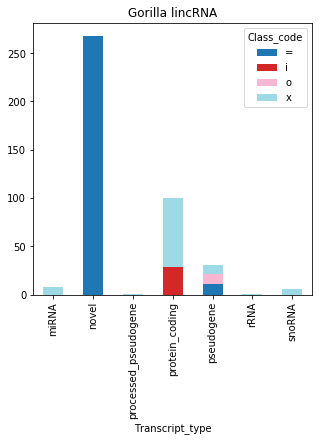

In [67]:
df = pd.read_csv("./abi/Gorilla.csv")
df = df[["Transcript","Class_code","Transcript_type"]]
df3 = df2.merge(df, left_on="Gorilla", right_on="Transcript")
mask = df3.Class_code == "u"
column_name = "Transcript_type"
df3.loc[mask, column_name] = "novel"
df3.loc[df3.Transcript_type == "novel", 'Class_code'] = "="
mask = ["lincRNA"]
df3= df3.loc[df3['Type'].isin(mask)].copy()
df3.groupby(['Transcript_type', "Class_code"]).size().unstack().plot(kind='bar', title="Gorilla lincRNA",
                                                                         stacked=True, figsize=(5, 5),
                                                                         cmap="tab20", legend=True)

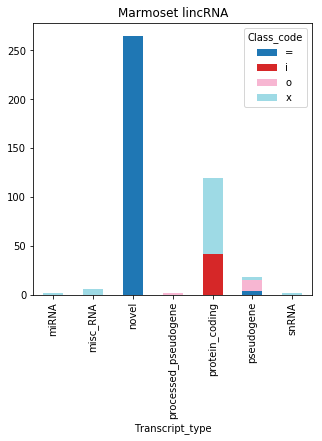

In [66]:
df = pd.read_csv("./abi/Marmoset.csv")
df = df[["Transcript","Class_code","Transcript_type"]]
df3 = df2.merge(df, left_on="Marmoset", right_on="Transcript")
mask = df3.Class_code == "u"
column_name = "Transcript_type"
df3.loc[mask, column_name] = "novel"
df3.loc[df3.Transcript_type == "novel", 'Class_code'] = "="
mask = ["lincRNA"]
df3= df3.loc[df3['Type'].isin(mask)].copy()
df3.groupby(['Transcript_type', "Class_code"]).size().unstack().plot(kind='bar', title="Marmoset lincRNA",
                                                                         stacked=True, figsize=(5, 5),
                                                                         cmap="tab20", legend=True)

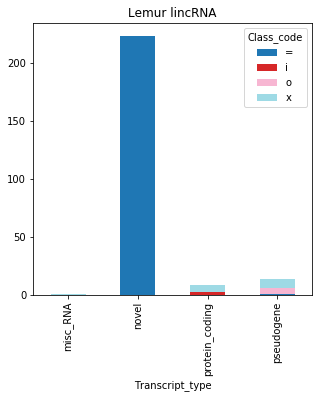

In [65]:
df = pd.read_csv("./abi/Lemur.csv")
df = df[["Transcript","Class_code","Transcript_type"]]
df3 = df2.merge(df, left_on="Lemur", right_on="Transcript")
mask = df3.Class_code == "u"
column_name = "Transcript_type"
df3.loc[mask, column_name] = "novel"
df3.loc[df3.Transcript_type == "novel", 'Class_code'] = "="
mask = ["lincRNA"]
df3= df3.loc[df3['Type'].isin(mask)].copy()
df3.groupby(['Transcript_type', "Class_code"]).size().unstack().plot(kind='bar', title="Lemur lincRNA",
                                                                         stacked=True, figsize=(5, 5),
                                                                         cmap="tab20", legend=True)

In [80]:
df = pd.read_csv("./abi/Chimp.csv")
df = df[["Transcript","Class_code","Transcript_type"]]
mask = df.Class_code == "u"
column_name = "Transcript_type"
df.loc[mask, column_name] = "novel"
df.loc[df.Transcript_type == "novel", 'Class_code'] = "="
df.Transcript_type.value_counts()

novel                   13283
protein_coding           4614
pseudogene                 85
miRNA                      71
misc_RNA                   62
snRNA                      61
snoRNA                     32
rRNA                       12
processed_pseudogene        6
Name: Transcript_type, dtype: int64

In [83]:
df = pd.read_csv("./abi/Gorilla.csv")
df = df[["Transcript","Class_code","Transcript_type"]]
mask = df.Class_code == "u"
column_name = "Transcript_type"
df.loc[mask, column_name] = "novel"
df.loc[df.Transcript_type == "novel", 'Class_code'] = "="
df.Transcript_type.value_counts()

novel                   6616
protein_coding          2971
pseudogene               247
snoRNA                    31
snRNA                     29
miRNA                     27
processed_pseudogene      24
misc_RNA                  14
rRNA                       6
Name: Transcript_type, dtype: int64

In [82]:
df = pd.read_csv("./abi/Marmoset.csv")
df = df[["Transcript","Class_code","Transcript_type"]]
mask = df.Class_code == "u"
column_name = "Transcript_type"
df.loc[mask, column_name] = "novel"
df.loc[df.Transcript_type == "novel", 'Class_code'] = "="
df.Transcript_type.value_counts()

novel                   6989
protein_coding          3465
pseudogene               191
snRNA                     62
misc_RNA                  51
miRNA                     35
processed_pseudogene      25
snoRNA                    23
rRNA                      12
Name: Transcript_type, dtype: int64

In [81]:
df = pd.read_csv("./abi/Lemur.csv")
df = df[["Transcript","Class_code","Transcript_type"]]
mask = df.Class_code == "u"
column_name = "Transcript_type"
df.loc[mask, column_name] = "novel"
df.loc[df.Transcript_type == "novel", 'Class_code'] = "="
df.Transcript_type.value_counts()

novel             7511
protein_coding    3532
pseudogene         247
misc_RNA            47
snoRNA              29
snRNA               21
rRNA                17
miRNA               12
Name: Transcript_type, dtype: int64

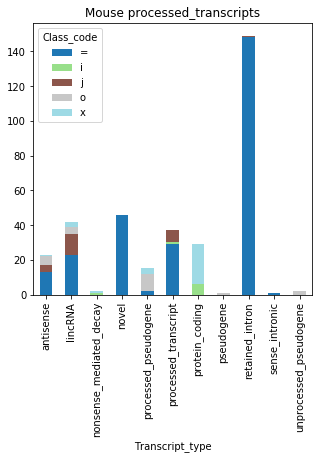

In [99]:
df = pd.read_csv("./counterparts.csv")
mask = df.Class_code == "u"
column_name = "Transcript_type"
df.loc[mask, column_name] = "novel"
df.loc[df.Transcript_type == "novel", 'Class_code'] = "="
df = df.drop(df[df.Class_code != "="].index)
df2= df.copy()
df3 =df2[["lnc","Class_code","Transcript_type"]]


df2 = pd.read_csv("./ort/Mouse.csv")
df2 = df2[["lnc", "ortholog"]]
df_t = df2.merge(df3, left_on="lnc", right_on="lnc")
df_t.columns = ["lnc", "ortholog", "Class", "Type"]


df = pd.read_csv("./abi/Mouse.csv")
df = df[["Transcript","Class_code","Transcript_type"]]
df3 = df_t.merge(df, left_on="ortholog", right_on="Transcript")
mask = df3.Class_code == "u"
column_name = "Transcript_type"
df3.loc[mask, column_name] = "novel"
df3.loc[df3.Transcript_type == "novel", 'Class_code'] = "="
mask = ["processed_transcript"]
df3= df3.loc[df3['Type'].isin(mask)].copy()
df3.groupby(['Transcript_type', "Class_code"]).size().unstack().plot(kind='bar', title="Mouse processed_transcripts",
                                                                         stacked=True, figsize=(5, 5),
                                                                         cmap="tab20", legend=True)

# conserved everywhere

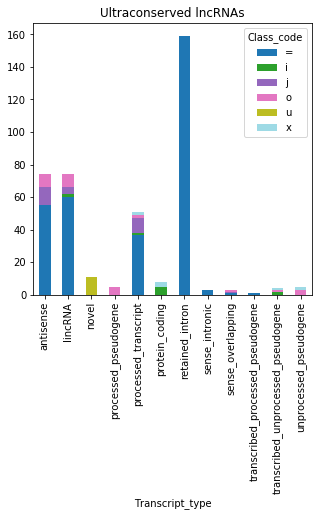

In [222]:
df = pd.read_csv("./counterparts.csv")
df = df[["lnc","Class_code", "Transcript_type", "No_of_exons"]]
df.columns=["lncRNA_ID","Class_code", "Transcript_type", "No_of_exons"]
df2 = pd.read_csv("./conserved.csv")
df2= df2[["lncRNA_ID", "Human_UCNE"]]
df["Conserved12"] = "Conserved"

df2 = df2.merge(df, left_on="lncRNA_ID", right_on="lncRNA_ID")
df2
df2.groupby(['Transcript_type', "Class_code"]).size().unstack().plot(kind='bar', title="Ultraconserved lncRNAs",
                                                                         stacked=True, figsize=(5, 5),
                                                                         cmap="tab20", legend=True)

In [223]:
df2.groupby(['Transcript_type', "Class_code"]).size().unstack()

Class_code                              =    i     j    o     u    x
Transcript_type                                                     
antisense                            55.0  NaN  11.0  8.0   NaN  NaN
lincRNA                              60.0  2.0   4.0  8.0   NaN  NaN
novel                                 NaN  NaN   NaN  NaN  11.0  NaN
processed_pseudogene                  NaN  NaN   NaN  5.0   NaN  NaN
processed_transcript                 37.0  1.0   9.0  2.0   NaN  2.0
protein_coding                        NaN  5.0   NaN  NaN   NaN  3.0
retained_intron                     159.0  NaN   NaN  NaN   NaN  NaN
sense_intronic                        3.0  NaN   NaN  NaN   NaN  NaN
sense_overlapping                     1.0  NaN   1.0  1.0   NaN  NaN
transcribed_processed_pseudogene      1.0  NaN   NaN  NaN   NaN  NaN
transcribed_unprocessed_pseudogene    NaN  2.0   NaN  1.0   NaN  1.0
unprocessed_pseudogene                NaN  NaN   NaN  3.0   NaN  2.0

In [221]:
df2.shape

(327, 19)

dt =pd.read_csv("./syntenic_vs_exonic_classification.tsv", sep="\t")
dt
df2 = df2.merge(dt, left_on="lncRNA_ID", right_on="Transcript")
df2
for i in range(8, 19,1):
    print(df2.iloc[:,i].value_counts())

In [224]:
df2.shape

(398, 6)

In [ ]:
#df2[df2.Bonobo == "none"]

df2[df2["Bonobo"] == "locus"]

one_filter = (df2["Gorilla"] == "none")
filtered = df2[one_filter]
filtered.head()

In [226]:
temp = pd.read_csv("./human.csv")
temp = temp[["Transcript","Description","Gene.Name"]]
temp.columns =["Transcript","Description","Gene_Name"]
df2 = df2.merge(temp, left_on="lncRNA_ID", right_on="Transcript")

In [229]:
df2[df2.Class_code == "="].Description.unique()

array(['pumilio RNA-binding family member 1', 'zinc finger protein 195',
       'mediator complex subunit 19',
       '6-pyruvoyltetrahydropterin synthase',
       'coiled-coil domain containing 84', nan, 'ribosomal protein S25',
       'heat shock 70kDa protein 8',
       'spermatogenesis associated, serine-rich 2', 'keratin 8, type II',
       'zinc finger protein 84', 'zinc finger protein 26',
       'zinc finger protein 605', 'ribosomal protein L21',
       'HECT domain containing E3 ubiquitin protein ligase 1',
       'gem (nuclear organelle) associated protein 2',
       'KTN1 antisense RNA 1', 'PSMA3 antisense RNA 1',
       'ribosomal protein S29', 'ULK4 pseudogene 1',
       'golgin A8 family, member B', 'RAB11A, member RAS oncogene family',
       'transmembrane protein 8A',
       'NME/NM23 nucleoside diphosphate kinase 4',
       'zinc finger protein 200', 'tigger transposable element derived 7',
       'proline, glutamate and leucine rich protein 1',
       'zinc finger pr

In [231]:
df2[df2.Transcript_type == "processed_transcript"].Description.unique()

array(['zinc finger protein 26', 'RAB11A, member RAS oncogene family',
       'mortality factor 4 like 1',
       'tigger transposable element derived 7',
       'tripartite motif containing 16',
       'leucine rich repeat containing 37B',
       'neighbor of BRCA1 gene 2 (non-protein coding)',
       'long intergenic non-protein coding RNA 674',
       'zinc finger protein 644', 'zinc finger protein 791',
       'zinc finger protein 429', 'zinc finger protein 43', nan,
       'zinc finger protein 529', 'zinc finger protein 345',
       'zinc finger protein 45', 'zinc finger protein 28',
       'zinc finger protein 611', 'zinc finger protein 749',
       'zinc finger protein 418', 'zinc finger protein 544',
       'ribosomal protein L23a pseudogene 7',
       'neuroblastoma breakpoint family, member 15',
       'tektin 4 pseudogene 2', 'ribosomal protein L23a pseudogene 82',
       'EMC3 antisense RNA 1', 'Dmx-like 1', 'HLA-F antisense RNA 1',
       'SFT2 domain containing 1', 'zinc 

In [232]:
df2[df2.Transcript_type == "antisense"].Description.unique()

array([nan, 'KTN1 antisense RNA 1', 'PSMA3 antisense RNA 1',
       'ENO1 antisense RNA 1', 'ZNF561 antisense RNA 1 (head to head)',
       'LIPE antisense RNA 1', 'ZNF790 antisense RNA 1',
       'ZNF793 antisense RNA 1 (head to head)', 'A1BG antisense RNA 1',
       'ZNF337 antisense RNA 1', 'ZNF197 antisense RNA 1',
       'NR2F1 antisense RNA 1', 'TRIM52 antisense RNA 1 (head to head)',
       'ZSCAN16 antisense RNA 1', 'ZNRD1 antisense RNA 1',
       'UBAP1-MVB12-associated (UMA) domain containing 1',
       'OR2A1 antisense RNA 1', 'SVIL antisense RNA 1'], dtype=object)

In [233]:
df2[df2.Transcript_type == "lincRNA"].Description.unique()

array([nan, 'long intergenic non-protein coding RNA 667',
       'ZNF30 antisense RNA 1',
       'long intergenic non-protein coding RNA 665',
       'ZNF582 antisense RNA 1 (head to head)',
       'endogenous retrovirus group K3, member 1',
       'long intergenic non-protein coding RNA 623',
       'long intergenic non-protein coding RNA 869',
       'long intergenic non-protein coding RNA 1138',
       'long intergenic non-protein coding RNA 657',
       'long intergenic non-protein coding RNA 1170',
       'HLA complex group 11 (non-protein coding)',
       'cytochrome P450, family 4, subfamily F, polypeptide 26, pseudogene',
       'KDM5C adjacent non-coding transcript',
       'long intergenic non-protein coding RNA 630'], dtype=object)

In [235]:
df2[df2.Transcript_type == "protein_coding"].Description.unique() #protein_coding  retained_intron

array(['heat shock 70kDa protein 8', 'slingshot protein phosphatase 2',
       'zinc finger protein 546', 'zinc finger protein 404',
       'major histocompatibility complex, class I, E',
       'N-acyl phosphatidylethanolamine phospholipase D',
       'nuclear factor I/B', 'ankyrin repeat domain 18A'], dtype=object)

In [236]:
df2.Transcript_type.unique()
#df2.shape

array(['retained_intron', 'lincRNA', 'protein_coding', 'antisense',
       'novel', 'processed_transcript', 'processed_pseudogene',
       'transcribed_unprocessed_pseudogene', 'unprocessed_pseudogene',
       'sense_intronic', 'transcribed_processed_pseudogene',
       'sense_overlapping'], dtype=object)